In [2]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import datetime
from scipy.optimize import curve_fit
from scipy.special import factorial

In [3]:
from ELOSS import *

In [4]:
def Range(KE,mass,dx):
    dist = 0.
    while KE > 0.1:
        #print 'star KE : %.02f'%KE
        eloss = rho * dedx(KE,mass,dens=True)
        KE -= (eloss * dx)
        dist += dx
        #print 'KE : %.02f dEdx : %.02f distance : %.02f'%(KE,eloss,dist)
    return dist

In [5]:
def KE_from_Range(R,mass,stepmax):
    KE = 0.3 # MeV
    dist = 0.
    thisstep = 1e-3        
    while ((dist+thisstep) < R):
        eloss = rho * dedx(KE,mass,dens=True)
        #print 'step: %.03f dEdx at KE %.02f is %.02f. Total dist : %.03f'%(thisstep,KE,eloss,dist)
        KE += (eloss * thisstep)
        dist += thisstep
        # update step size in an efficient way
        if ((thisstep < dist/10.) and (dist/10. < stepmax)):
            thisstep = dist/10.
    return KE

In [6]:
def dEdx_from_Range(R,mass,stepmax,pitch):
    KE = 0.3 # MeV
    dist = 0.
    thisstep = 1e-3        
    while ((dist+thisstep) < R):
        eloss = rho * dedx(KE,mass,dens=True)
        #print 'step: %.03f dEdx at KE %.02f is %.02f. Total dist : %.03f'%(thisstep,KE,eloss,dist)
        KE += (eloss * thisstep)
        dist += thisstep
        # update step size in an efficient way
        if ((thisstep < dist/10.) and (dist/10. < stepmax)):
            thisstep = dist/10.
    return dpdx(KE,pitch,mass)

In [7]:
STEP = 0.1 # in cm
MASS = 938.272 # MeV

In [8]:
KE = 70.
print(Range(KE,MASS,STEP))
print(KE_from_Range(Range(KE,MASS,STEP),MASS,STEP))

4.300000000000001
71.64852792383319


In [9]:
# range from KE
range_v = []
KE_v = np.linspace(5,500,100)
dedx_v = []
for KE in KE_v:
    range_v.append(Range(KE,MASS,STEP))
    dedx_v.append( rho * dedx(KE,MASS,dens=True) )
    
# KE from range
KEfromR_v = []
for R in range_v:
    #print 'range : %.02f'%R
    KEv = KE_from_Range(R,MASS,STEP)
    #print 'KE : %.02f'%KEv
    KEfromR_v.append(KEv)

In [10]:
# LArSoft implementation
KE2_v = []
for r in range_v:
    KE2_v.append( 29.9317 * (r**0.586304) )

In [11]:
matplotlib.rcParams.update({'font.size': 16})

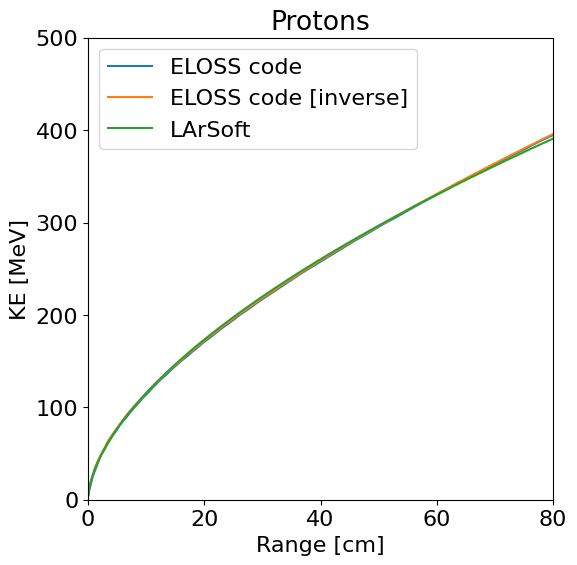

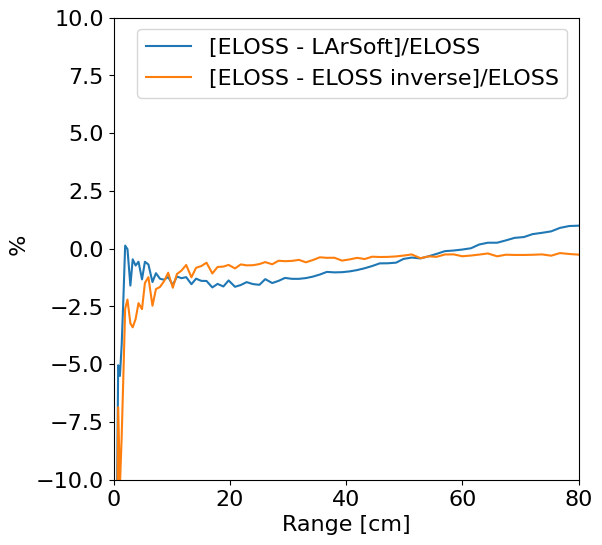

In [12]:
fig = plt.figure(figsize=(6,6))
plt.plot(range_v,KE_v ,label='ELOSS code')
plt.plot(range_v,KEfromR_v ,label='ELOSS code [inverse]')
plt.plot(range_v,KE2_v,label='LArSoft')
plt.xlim([0,80])
plt.ylim([0,500])
plt.legend()
plt.xlabel('Range [cm]')
plt.ylabel('KE [MeV]')
plt.title('Protons')
plt.show()

fig = plt.figure(figsize=(6,6))
plt.plot(range_v,100.*(KE_v-KE2_v)/KE_v,label='[ELOSS - LArSoft]/ELOSS')
plt.plot(range_v,100.*(KE_v-KEfromR_v)/KE_v,label='[ELOSS - ELOSS inverse]/ELOSS')
#plt.plot(range_v,KE2_v,label='LArSoft')
plt.xlim([0,80])
plt.ylim([-10,10])
plt.legend()
plt.xlabel('Range [cm]')
plt.ylabel(' %')
#plt.title('Protons')
plt.show()

In [13]:
PITCH = 0.3

range_v = np.linspace(0.01,70,100)
dEdx_v = []
for R in range_v:
    dEdx_v.append(dEdx_from_Range(R,MASS,STEP,PITCH))

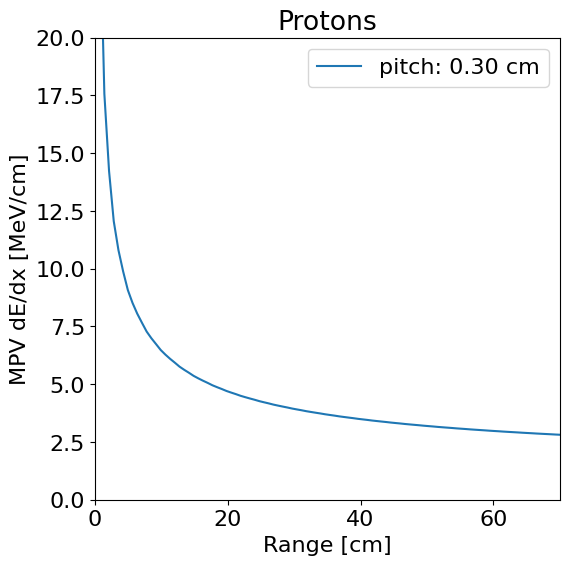

In [14]:
fig = plt.figure(figsize=(6,6))
plt.plot(range_v,dEdx_v ,label='pitch: %.02f cm'%PITCH)
plt.xlim([0,80])
plt.ylim([0,20])
plt.legend()
plt.xlabel('Range [cm]')
plt.ylabel('MPV dE/dx [MeV/cm]')
plt.title('Protons')
plt.xlim([0,70])
plt.ylim([0,20])
plt.show()